In [1]:
import pandas as pd

import numpy as np

#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', #mostly controls relative sizes of things on plot #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
        style = 'darkgrid', #dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        palette = 'deep', # Should be something that color_palette() can process.
        font_scale = 1, 
        color_codes = False, 
        rc = None)

# from IPython.core.interactiveshell import InteractiveShell 
# InteractiveShell.ast_node_interactivity = 'last_expr' #s etting = "all" allows multiple outputs to be displayed for a given input cell. don't use w plotting!

from IPython.display import display

%matplotlib notebook
#%matplotlib inline

pd.__version__, sns.__version__ , np.__version__ #,  matplotlib.__version__

('0.23.3', '0.9.0', '1.14.2')

In [3]:
# some functions to load

def head_with_full_columns(pd_in, row_amount = 5):
    with pd.option_context('display.max_columns', len(pd_in.iloc[0])):
        display(pd_in[:row_amount])
        
def balanced_sample(df_in, total_size, rand_state):
    s0 = df_in[df_in['TARGET']==0].sample(n = total_size//2, random_state = rand_state)
    s1 = df_in[df_in['TARGET']==1].sample(n = total_size//2, random_state = rand_state)
    new_df = pd.concat([s0,s1])
    new_df.sort_index(inplace = True)
    return new_df

def which_df(feature):
    if feature in application_train_df_f_list:
        return feature, 'application_train_df'
    
    if feature in bureau_df_f_list:
        return feature, 'bureau_df'
        
    if feature in bureau_balance_df_f_list:
        return feature, 'bureau_balance_df'
        
    if feature in credit_card_balance_df_f_list:
        return feature, 'credit_card_balance_df'
    
    if feature in installments_payments_df_f_list:
        return feature, 'installments_payments_df'
        
    if feature in POS_CASH_balance_df_f_list:
        return feature, 'POS_CASH_balance_df'
        
    if feature in previous_application_df_f_list:
        return feature, 'previous_application_df'

In [4]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk/exploration_n_plotting'

In [5]:
cd '/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk'

/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk


In [6]:
path_to_raw_data = 'raw_loan_data_from_Kaggle/'

# define data and basic information

## load as dfs

In [7]:
# I had these indexed by SK_ID_CURRs originally, that does create some problems later when I would rather treat that as a key
# THAT SAID, it does seem to be easier to merge on indices than a column. and I do go back to this way later at some points. 


In [8]:
application_train_df = pd.read_csv(path_to_raw_data + 'application_train.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 
f_list = list(application_train_df.select_dtypes('object').columns)
application_train_df[f_list] = application_train_df[f_list].fillna(value = 'NA')
# AMT_ANNUITY appears in multiple files, so rename more specifically. 
application_train_df.rename(columns = {"AMT_ANNUITY":"AMT_ANNUITY_from_app_train"} , inplace=True) #index = str, 
del f_list

In [9]:
bureau_df = pd.read_csv(path_to_raw_data + 'bureau.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 
f_list = list(bureau_df.select_dtypes('object').columns)
bureau_df[f_list] = bureau_df[f_list].fillna(value = 'NA')
# AMT_ANNUITY appears in multiple files, so rename more specifically. 
bureau_df.rename( columns = {"AMT_ANNUITY":"AMT_ANNUITY_from_bureau"} , inplace=True)# index = str,
del f_list

In [10]:
# this just has SK_ID_BUREAU, not SK_ID_CURR
bureau_balance_df  = pd.read_csv(path_to_raw_data + 'bureau_balance.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 
f_list = list(bureau_balance_df.select_dtypes('object').columns)
bureau_balance_df[f_list] = bureau_balance_df[f_list].fillna(value = 'NA')
del f_list

In [11]:
credit_card_balance_df = pd.read_csv(path_to_raw_data + 'credit_card_balance.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 
f_list = list(credit_card_balance_df.select_dtypes('object').columns)
credit_card_balance_df[f_list] = credit_card_balance_df[f_list].fillna(value = 'NA')
del f_list

In [12]:
# these are just descriptions of columns in files, so doesn't matter too much
# gave error on codec, used encoding from 
# https://stackoverflow.com/questions/45492678/unicodedecodeerror-utf-8-codec-cant-decode-byte-0xcc-in-position-3-invalid
# I have no idea what first column is in original csv. 
HomeCredit_columns_description_df = pd.read_csv(path_to_raw_data + 'HomeCredit_columns_description.csv', encoding='cp1252').T

In [13]:
installments_payments_df = pd.read_csv(path_to_raw_data + 'installments_payments.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 

f_list = list(installments_payments_df.select_dtypes('object').columns)
installments_payments_df[f_list] = installments_payments_df[f_list].fillna(value = 'NA')
del f_list

In [14]:
POS_CASH_balance_df = pd.read_csv(path_to_raw_data + 'POS_CASH_balance.csv')#, index_col = 'SK_ID_CURR')
# replace NaNs in object entries for now is pretty safe. 

f_list = list(POS_CASH_balance_df.select_dtypes('object').columns)
POS_CASH_balance_df[f_list] = POS_CASH_balance_df[f_list].fillna(value = 'NA')
del f_list

In [15]:
previous_application_df = pd.read_csv(path_to_raw_data + 'previous_application.csv')#, index_col = 'SK_ID_CURR')

# replace NaNs in object entries for now is pretty safe. 
f_list = list(previous_application_df.select_dtypes('object').columns)
previous_application_df[f_list] = previous_application_df[f_list].fillna(value = 'NA')
# AMT_ANNUITY appears in multiple files, so rename more specifically. 
previous_application_df.rename( columns = {"AMT_ANNUITY":"AMT_ANNUITY_from_previous_application"} , inplace=True) #index = str,
del f_list

## How much of the training data IDs are reped in all the other CSVs?

In [13]:
# load dfs before using this. 
application_train_df_f_list = list(application_train_df.columns)
bureau_df_f_list = list(bureau_df.columns)
bureau_balance_df_f_list = list(bureau_balance_df.columns)
credit_card_balance_df_f_list = list(credit_card_balance_df.columns)
installments_payments_df_f_list = list(installments_payments_df.columns)
POS_CASH_balance_df_f_list = list(POS_CASH_balance_df.columns)
previous_application_df_f_list = list(previous_application_df.columns)

In [14]:
df_dict = {'application_train_df':application_train_df,'bureau_df':bureau_df,'bureau_balance_df':bureau_balance_df,
           'credit_card_balance_df':credit_card_balance_df, 'installments_payments_df':installments_payments_df, 
           'POS_CASH_balance_df':POS_CASH_balance_df, 'previous_application_df':previous_application_df}

In [15]:
def find_len_of_key(dafr, key):
    """Catches cases where key might be in that DF, otherwise report the length. """
    
    temp = df_dict[dafr].get(key, False)
    
    if temp is not False:
        return len(np.unique(temp))
    else:
        return 0
    
def find_per_of_SK_ID_CURRs(dafr):
    """Find the percentage of SK_ID_CURRS that application_train_df and another DF share."""
    temp = df_dict[dafr].get('SK_ID_CURR', False)
    
    if temp is not False:
        return len( set(application_train_df['SK_ID_CURR']) & set(df_dict[dafr]['SK_ID_CURR']) ) / len(application_train_df['SK_ID_CURR'])
    else:
        return 0

In [16]:
pd.DataFrame( [[key, 
                len(df_dict[key].index), 
                len(df_dict[key].columns), 
                find_len_of_key(key, 'SK_ID_CURR'), 
                find_len_of_key(key, 'SK_ID_PREV'), 
                find_len_of_key(key, 'SK_ID_BUREAU'), 
                find_per_of_SK_ID_CURRs(key)] for key in df_dict], 
                           columns = ['Dataframe', 'index size' ,'col size','unique SK_ID_CURRs', 'unique SK_ID_PREVs',
                                      'unique SK_ID_BUREAUs', '% of SK_ID_CURRs found in application_train_df'])

,Dataframe,index size,col size,unique SK_ID_CURRs,unique SK_ID_PREVs,unique SK_ID_BUREAUs,% of SK_ID_CURRs found in application_train_df
0,application_train_df,307511,122,307511,0,0,1.000000
1,bureau_df,1716428,17,305811,0,1716428,0.856851
2,bureau_balance_df,27299925,3,0,0,817395,0.000000
3,credit_card_balance_df,3840312,23,103558,104307,0,0.282608
4,installments_payments_df,13605401,8,339587,997752,0,0.948399
5,POS_CASH_balance_df,10001358,8,337252,936325,0,0.941248
6,previous_application_df,1670214,37,338857,1670214,0,0.946493


In [27]:
# create index of SK_ID_CURRs from application_train_df
CURR_IDs_from_app_train_df = pd.DataFrame(application_train_df['SK_ID_CURR'],columns=['SK_ID_CURR'])
CURR_IDs_from_app_train_df.set_index('SK_ID_CURR',inplace = True)
indx_3 = CURR_IDs_from_app_train_df.index

# create df with SK_ID_CURRs and SK_ID_BUREAUs from bureau_df with SK_ID_BUREAU as index
CURR_AND_BUREAU_IDs_from_bureau_df = bureau_df[['SK_ID_CURR','SK_ID_BUREAU']]
CURR_AND_BUREAU_IDs_from_bureau_df.set_index('SK_ID_BUREAU', inplace=True)

# create df with SK_ID_CURRs and SK_ID_BUREAUs from bureau_balance_df with SK_ID_BUREAU as index
BUREAU_IDs_from_bureau_balance_df  = pd.DataFrame(np.unique(bureau_balance_df['SK_ID_BUREAU']), columns=['SK_ID_BUREAU'])
BUREAU_IDs_from_bureau_balance_df.set_index('SK_ID_BUREAU', inplace = True)

# find all SK_ID_BUREAUs that appear in both bureau_df and bureau_balance_df
indx_1 = CURR_AND_BUREAU_IDs_from_bureau_df.index
indx_2 = BUREAU_IDs_from_bureau_balance_df.index
relavant_BUREAU_IDs_in_balance = indx_1.intersection(indx_2)

# SK_ID_CURRs and SK_ID_BUREAUs, from SK_ID_BUREAUs that appear in both bureau_df and bureau_balance_df
CURR_AND_BUREAU_IDs_from_bureau_balance_df = CURR_AND_BUREAU_IDs_from_bureau_df.loc[relavant_BUREAU_IDs_in_balance]

# find unique SK_ID_CURR IDs that appear in both bureau_df and bureau_balance_df
CURR_IDs_from_bureau_balance = np.unique(CURR_AND_BUREAU_IDs_from_bureau_balance_df['SK_ID_CURR'])

#finally, the ratio of SK_ID_CURRs that are repd in bureau_balance_df
frac= len(indx_3.intersection(CURR_IDs_from_bureau_balance)) /len(application_train_df) 
round(frac,4)

0.2999

## target class counts

In [20]:
application_train_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [21]:
application_train_df['TARGET'].value_counts()[0]/ len(application_train_df['TARGET']) , application_train_df['TARGET'].value_counts()[1]/ len(application_train_df['TARGET'])

(0.9192711805431351, 0.08072881945686496)

# preliminary exploration

## null counts by feature - no new information

In [95]:
def null_value_counts(df_in, feature):
    """Returns the fraction of TARGET = 0 and 1 for a given feature."""
    nan_counts = df_in[df_in[feature].isnull()]['TARGET'].value_counts()
    if nan_counts.size == 0:
        return None
    
    try: 
        val_0 = nan_counts.loc[0]
    except KeyError:
        val_0 = 0
    
    try:
        val_1 = nan_counts.loc[1]
    except KeyError:
        val_1 = 0
    
    tot = val_0 + val_1
    
    return [tot, val_0/tot, val_1/tot]

In [221]:
nan_dict = {}
for f in application_train_df.columns:
    x = null_value_counts(application_train_df, f)
    if x:
        nan_dict[f] = x

In [257]:
nan_df = pd.DataFrame( nan_dict)
nan_df = nan_df.transpose()
nan_df.columns = ['NaN counts','% TARGET = 0','% TARGET = 1']
pd.options.display.max_rows = 200
display(nan_df)
pd.options.display.max_rows = 60

,NaN counts,% TARGET = 0,% TARGET = 1
AMT_ANNUITY_from_app_train,12.0,1.000000,0.000000
AMT_GOODS_PRICE,278.0,0.924460,0.075540
OWN_CAR_AGE,202929.0,0.915000,0.085000
CNT_FAM_MEMBERS,2.0,1.000000,0.000000
EXT_SOURCE_1,173378.0,0.914805,0.085195
EXT_SOURCE_2,660.0,0.921212,0.078788
EXT_SOURCE_3,60965.0,0.906881,0.093119
APARTMENTS_AVG,156061.0,0.908465,0.091535
BASEMENTAREA_AVG,179943.0,0.910872,0.089128
YEARS_BEGINEXPLUATATION_AVG,150007.0,0.907951,0.092049


In [109]:
# get a random sample bc full sample is too much
someee_sample = balanced_sample(application_train_df, 24000, 0)

In [97]:
nan_dict = {}
for f in someee_sample.columns:
    x = null_value_counts(someee_sample, f)
    if x:
        nan_dict[f] = x

In [98]:
nan_df = pd.DataFrame( nan_dict)
nan_df = nan_df.transpose()
nan_df.columns = ['NaN counts','% TARGET = 0','% TARGET = 1']
pd.options.display.max_rows = 200
display(nan_df)
pd.options.display.max_rows = 60

,NaN counts,% TARGET = 0,% TARGET = 1
AMT_GOODS_PRICE,28.0,0.571429,0.428571
OWN_CAR_AGE,16109.0,0.481967,0.518033
CNT_FAM_MEMBERS,1.0,1.000000,0.000000
EXT_SOURCE_1,13829.0,0.482175,0.517825
EXT_SOURCE_2,51.0,0.411765,0.588235
EXT_SOURCE_3,5024.0,0.467158,0.532842
APARTMENTS_AVG,12781.0,0.463422,0.536578
BASEMENTAREA_AVG,14521.0,0.469320,0.530680
YEARS_BEGINEXPLUATATION_AVG,12333.0,0.462175,0.537825
YEARS_BUILD_AVG,16378.0,0.479546,0.520454


In [110]:
null_counts = someee_sample.isnull().sum(axis = 1)
null_counts.rename('null_counts', inplace=True);
someee_sample = pd.concat([someee_sample, null_counts], axis = 1)

In [114]:
someee_sample[['TARGET','null_counts']].corr()

,TARGET,null_counts
TARGET,1.000000,0.084885
null_counts,0.084885,1.000000


In [115]:
null_counts = application_train_df.isnull().sum(axis = 1)
null_counts.rename('null_counts', inplace=True);
application_train_df = pd.concat([application_train_df, null_counts], axis = 1)

## EXPLORE DAYS_EMPLOYED = 365243 values that don't make sense (should be <0!). Vast majority are 'NAME_INCOME_TYPE' = 'Pensioner's. Not sure if this can help though. 

In [16]:
# I used to drop these, but that is too harsh, they seem to have useful information
# # these damn things drive me crazy later when I am assuming all the DAYS_EMPLOYED are <0 etc. 
# DAYS_EMPLOYED_median = application_train_df[application_train_df['DAYS_EMPLOYED'] != 365243]['DAYS_EMPLOYED'].median()
# application_train_df['DAYS_EMPLOYED'].replace(365243,DAYS_EMPLOYED_median, inplace = True)

In [134]:
application_train_df[(application_train_df['NAME_INCOME_TYPE']=='Pensioner')].size,  \
application_train_df[ (application_train_df['DAYS_EMPLOYED']==365243 ) ].size,  \
application_train_df[(application_train_df['NAME_INCOME_TYPE']=='Pensioner') & (application_train_df['DAYS_EMPLOYED']==365243 ) ].size

(4705770, 4706790, 4704920)

In [137]:
head_with_full_columns( application_train_df[(application_train_df['NAME_INCOME_TYPE']!='Pensioner') & \
                                             (application_train_df['DAYS_EMPLOYED']==365243 ) ]   )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_from_app_train,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,-13964,365243,-115.0,-4746,NaN,0,0,0,NA,1,3,3,FRIDAY,5,0,0,0,0,0,XNA,NaN,0.105875,0.824595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NaN,NA,NA,NaN,0,NaN,0,-325.0,0,0,0,0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,-15947,365243,-4219.0,-4212,NaN,0,0,0,NA,3,3,2,MONDAY,11,0,0,0,0,0,XNA,0.106761,0.617056,0.420611,0.0412,0.0387,0.7076,0.0161,0.00,0.0690,0.1667,0.2083,0.0349,0.0319,0.0316,0.0071,0.0420,0.0402,0.7190,0.0690,0.2083,0.0357,0.0349,0.0329,0.0075,0.0416,0.0387,0.7115,0.0162,0.0690,0.2083,0.0355,0.0325,0.0321,0.0072,reg oper account,block of flats,0.0351,Panel,No,2.0,0,2.0,0,-49.0,0,0,1,2
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,-23692,365243,-5661.0,-4715,NaN,0,0,0,NA,1,3,3,TUESDAY,14,0,0,0,0,0,XNA,NaN,0.006939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA,NA,NaN,NA,NA,0.0,0,0.0,0,-1436.0,0,0,0,1
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,1530000.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.011703,-17418,365243,-5086.0,-951,NaN,0,0,0,NA,1,2,2,MONDAY,12,0,0,0,0,0,XNA,NaN,0.585243,NaN,0.1237,0.0000,0.6736,0.0104,0.00,0.2069,0.1667,0.2083,0.0855,0.1009,0.0950,0.0000,0.1261,0.0000,0.6864,0.2069,0.2083,0.0875,0.1102,0.0990,0.0000,0.1249,0.0000,0.6780,0.0105,0.2069,0.2083,0.0870,0.1026,0.0967,0.0000,NA,block of flats,0.0747,"Stone, brick",No,3.0,0,2.0,0,-1169.0,0,0,0,1
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,585000.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,-12403,365243,-27.0,-866,4.0,0,1,1,NA,2,2,2,MONDAY,11,0,0,0,0,0,XNA,0.060694,0.276265,NaN,0.3021,0.1326,0.7960,0.0897,0.32,0.2759,0.3333,0.3750,0.1048,0.2412,0.2583,0.0183,0.3078,0.1376,0.8040,0.2759,0.3750,0.1072,0.2635,0.2691,0.0194,0.3050,0.1326,0.7987,0.0903,0.2759,0.3750,0.1066,0.2454,0.2629,0.0187,reg oper account,block of flats,0.2562,Panel,No,0.0,0,0.0,0,0.0,0,0,0,1


In [139]:
first_sample = balanced_sample(application_train_df, 24000, 0)

<IPython.core.display.Javascript object>


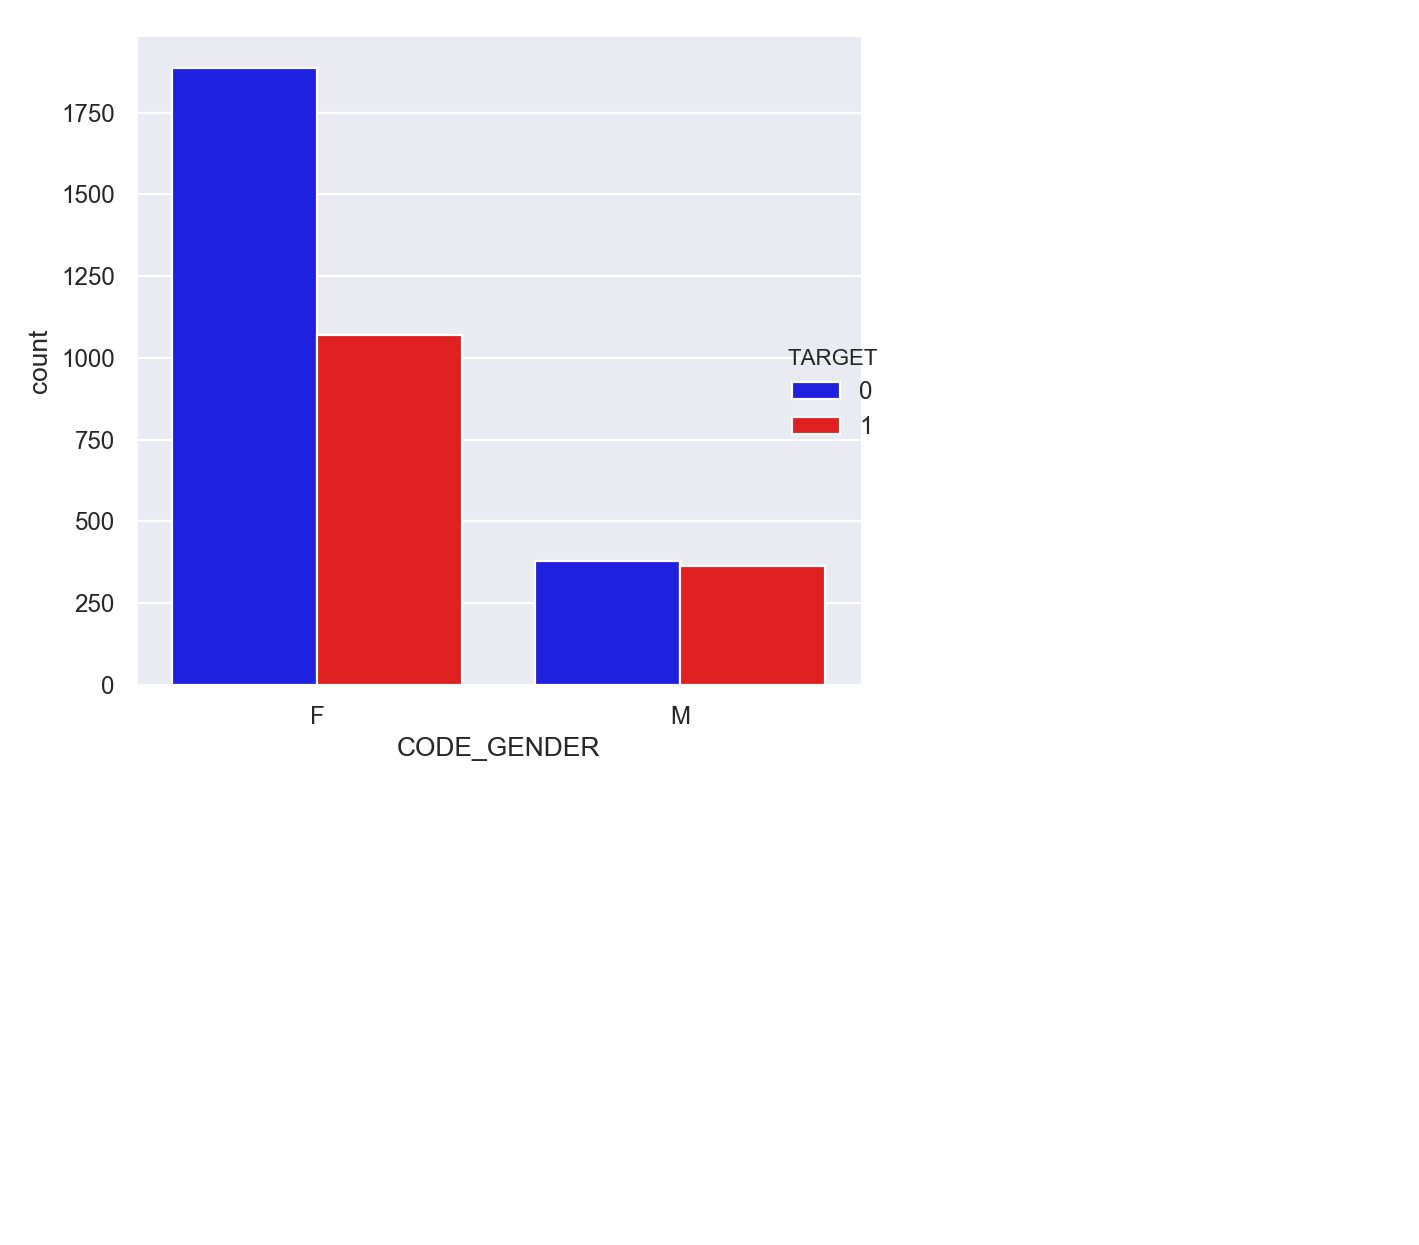

In [143]:
datt = first_sample[first_sample['DAYS_EMPLOYED']==365243]

# plt.figure()
# sns.countplot(data = datt, x = 'CODE_GENDER', hue='TARGET', palette=['red','blue'])

sns.catplot(data = datt, kind = 'count',x = 'CODE_GENDER', 
                hue='TARGET', palette=['blue','red']) #[datt.notnull()]
plt.tight_layout()

<IPython.core.display.Javascript object>


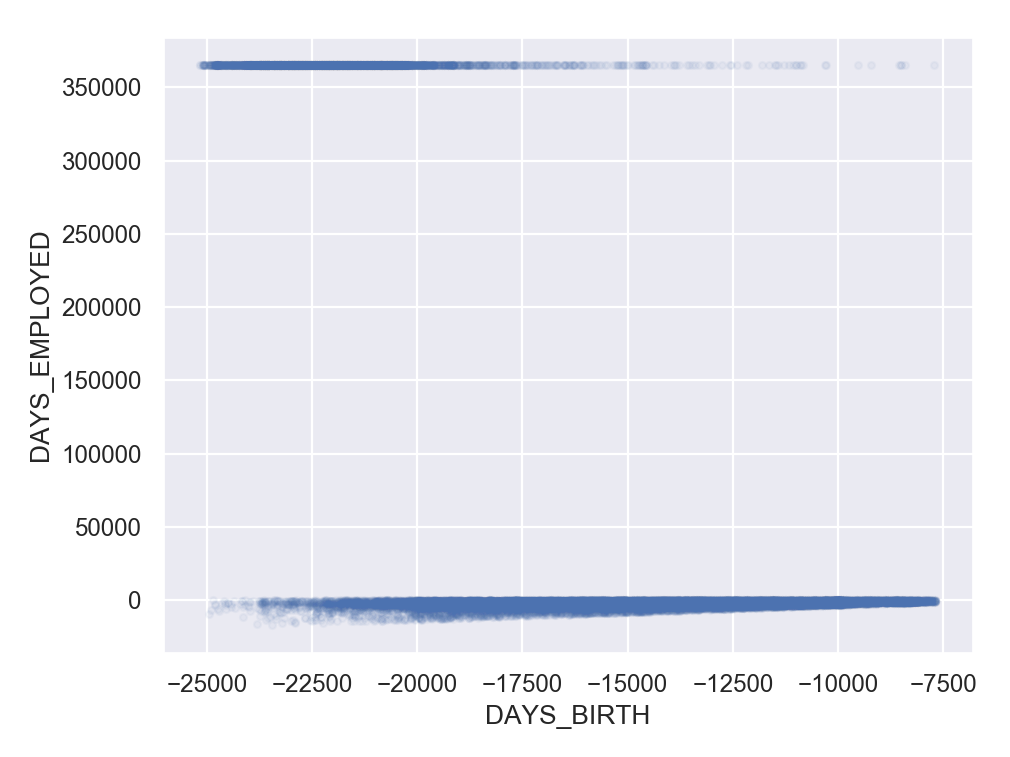

In [144]:
plt.figure()

sns.regplot(data = first_sample,
            x = 'DAYS_BIRTH',
            y = 'DAYS_EMPLOYED',
            fit_reg = False,
            scatter_kws={'alpha':.05,"s":10})


plt.tight_layout()

In [18]:
# find which values are >0. Turn out they are all 365243.
just_pos_DAYS_EMP = application_train_df[application_train_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'] 
list((just_pos_DAYS_EMP == 365243).values) == len(just_pos_DAYS_EMP)*[True]

True

There is definitely something wrong with this. From inspecting the values, there are some DAYS_EMPLOYED that are = 365243. This number should be negative, and the fact that all the positive values are the same positive value means something especially weird is going on. 

In [19]:
val_0 = len(  application_train_df[application_train_df['TARGET']==0]  )  
val_1 = len(  application_train_df[ application_train_df['TARGET']==1]  )
val_0/ (val_0+val_1) , val_1/ (val_0+val_1)

(0.9192711805431351, 0.08072881945686496)

In [20]:
val_0 = len(  application_train_df[(application_train_df['DAYS_EMPLOYED'] == 365243) & (application_train_df['TARGET']==0)]  )  
val_1 = len(  application_train_df[(application_train_df['DAYS_EMPLOYED'] == 365243) & (application_train_df['TARGET']==1)]  )
val_0/ (val_0+val_1) , val_1/ (val_0+val_1)

(0.946003539567306, 0.05399646043269404)

In [21]:
val_0 + val_1

55374

So they are slightly more likely to have TARGET = 0

In [22]:
application_train_df['DAYS_EMPLOYED'][:20]

0       -637
1      -1188
2       -225
3      -3039
4      -3038
5      -1588
6      -3130
7       -449
8     365243
9      -2019
10      -679
11    365243
12     -2717
13     -3028
14      -203
15     -1157
16     -1317
17      -191
18     -7804
19     -2038
Name: DAYS_EMPLOYED, dtype: int64

In [23]:
# get a random sample bc full sample is too much to plot
some_sample = balanced_sample(application_train_df, 24000, 0)

def make_days_empl_col(row):
    if row['DAYS_EMPLOYED']== 365243:
        return 'Y'
    else:
        return 'N'

some_sample['DAYS_EMPLOYED_eq_365243'] = some_sample.apply(make_days_empl_col, axis=1)

<IPython.core.display.Javascript object>


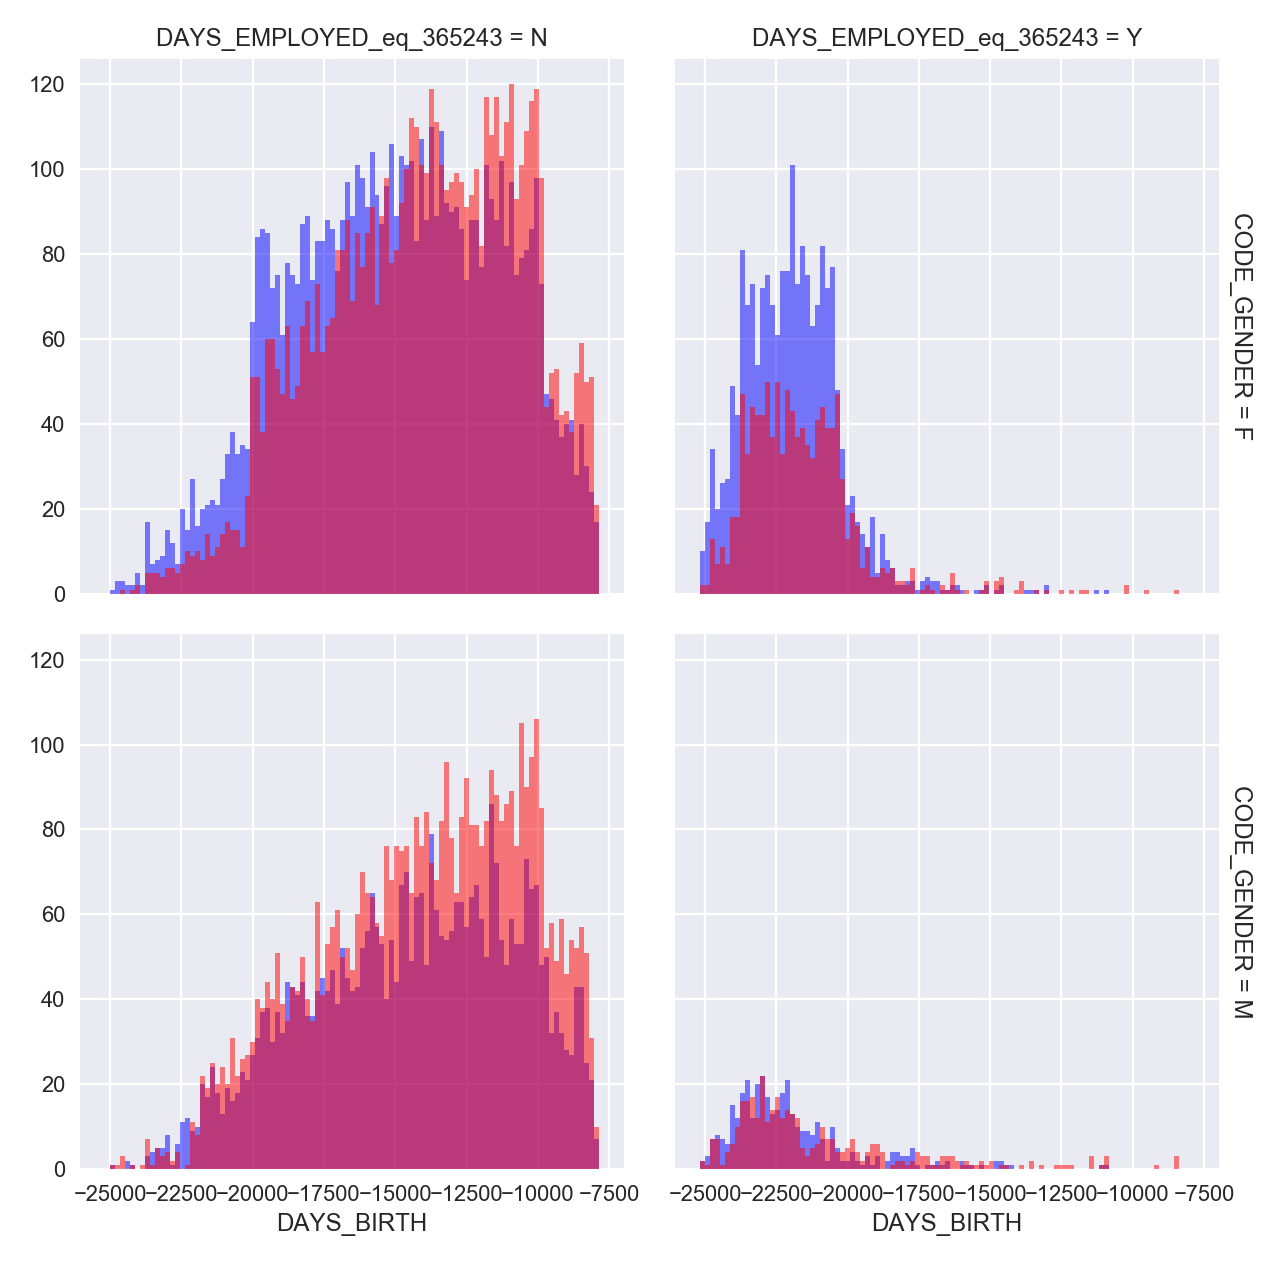

In [24]:
y_axs_feat = 'DAYS_BIRTH'

g = sns.FacetGrid(some_sample,
                  row = 'CODE_GENDER', 
                  col = 'DAYS_EMPLOYED_eq_365243', 
                  hue = 'TARGET',
                  palette = ['blue','red'],
                  size = 4,
                  margin_titles=True)

mn = min(some_sample[y_axs_feat])
mx = max(some_sample[y_axs_feat])

my_bins = np.arange(mn, mx, (mx-mn)/100)

g.map(plt.hist, y_axs_feat, bins = my_bins,**{'alpha':.5})

plt.tight_layout()

The above plot indicates there is useful information in this value as a categorical feature, especially when we consider the intersection the gender feature. So we will keep the information as a separate categorical feature. It remains how to replace the 365243 values in DAYS_EMPLOYED. One way is to replace those values with the mean or median of the DAYS_EMPLOYED feature. A better way is to find something that correlates with DAYS_EMPLOYED and use that to fill in the 'missing' values. 

In [25]:
application_train_df[application_train_df['DAYS_EMPLOYED']!=365243]['DAYS_EMPLOYED'].mean()

-2384.1693246132063

In [26]:
application_train_df[application_train_df['DAYS_EMPLOYED']!=365243]['DAYS_EMPLOYED'].median()

-1648.0

In [27]:
corrs = application_train_df[application_train_df['DAYS_EMPLOYED']!=365243].corr()['DAYS_EMPLOYED']
corrs.apply(abs).sort_values()[-10:]

AMT_GOODS_PRICE           0.093374
EXT_SOURCE_2              0.093444
REG_CITY_NOT_LIVE_CITY    0.114101
REG_CITY_NOT_WORK_CITY    0.128797
EXT_SOURCE_3              0.129722
DAYS_LAST_PHONE_CHANGE    0.141688
DAYS_REGISTRATION         0.171754
EXT_SOURCE_1              0.252712
DAYS_BIRTH                0.352321
DAYS_EMPLOYED             1.000000
Name: DAYS_EMPLOYED, dtype: float64

The the most correlated feature with DAYS_EMPLOYED IS DAYS_BIRTH. It isn't highly correlated, but I think using it to fill in DAYS_EMPLOYED is better than just using the mean or median. 

<IPython.core.display.Javascript object>


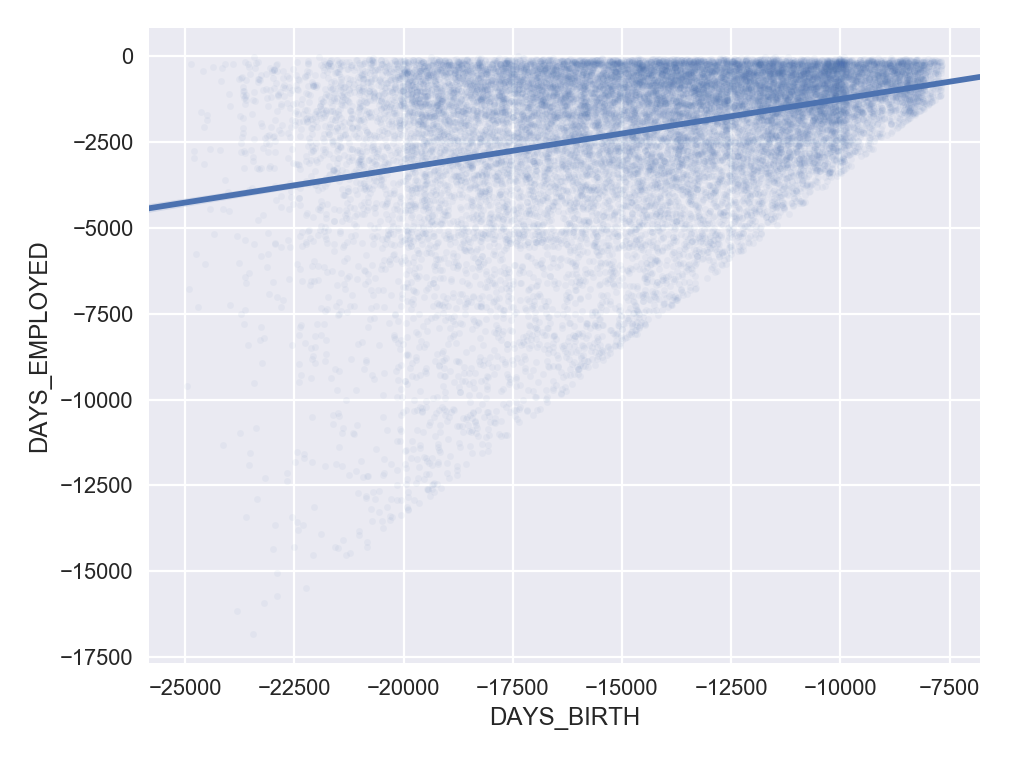

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [28]:
plt.figure()

sns.regplot(data = some_sample[(some_sample['DAYS_EMPLOYED']!=365243)],# & (some_sample['DAYS_BIRTH']<-20000)],
            x = 'DAYS_BIRTH',
            y = 'DAYS_EMPLOYED',
            scatter_kws={'alpha':.05,"s":10})

plt.tight_layout()

In [21]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
# have to make a list of lists, turn that into np.array, then transpose to has correct shape for the single feature(s) working w here. 
no_weird_vals_df = application_train_df[ application_train_df['DAYS_EMPLOYED'] !=365243]
reg.fit(np.array([no_weird_vals_df['DAYS_BIRTH'].values]).T, no_weird_vals_df['DAYS_EMPLOYED'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# check some values - checks!
reg.predict([[-25000],[-20000],[-15000],[-10000]])

array([-4685.48311394, -3560.79161498, -2436.10011601, -1311.40861705])

In [25]:
def make_days_empl_col(row):
    if row['DAYS_EMPLOYED']== 365243:
        return 'Y'
    else:
        return 'N'

# create a new binary column while I still have the 365243 values.
application_train_df['DAYS_EMPLOYED_eq_365243'] = application_train_df.apply(make_days_empl_col, axis=1)

In [26]:
# replace ['DAYS_EMPLOYED']==365243 with lin reg vals from above

def fix_DAYS_EMPLOYED(row):
    if row['DAYS_EMPLOYED']== 365243:
        return reg.predict( row['DAYS_BIRTH'] )[0] # need this [0] so it puts value and not a 1-dim array in place
    else:
        return row['DAYS_EMPLOYED']
    
application_train_df['DAYS_EMPLOYED'] = application_train_df.apply(fix_DAYS_EMPLOYED, axis = 1)

In [33]:
application_train_df[application_train_df['DAYS_EMPLOYED']==365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_from_app_train,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_eq_365243


<IPython.core.display.Javascript object>


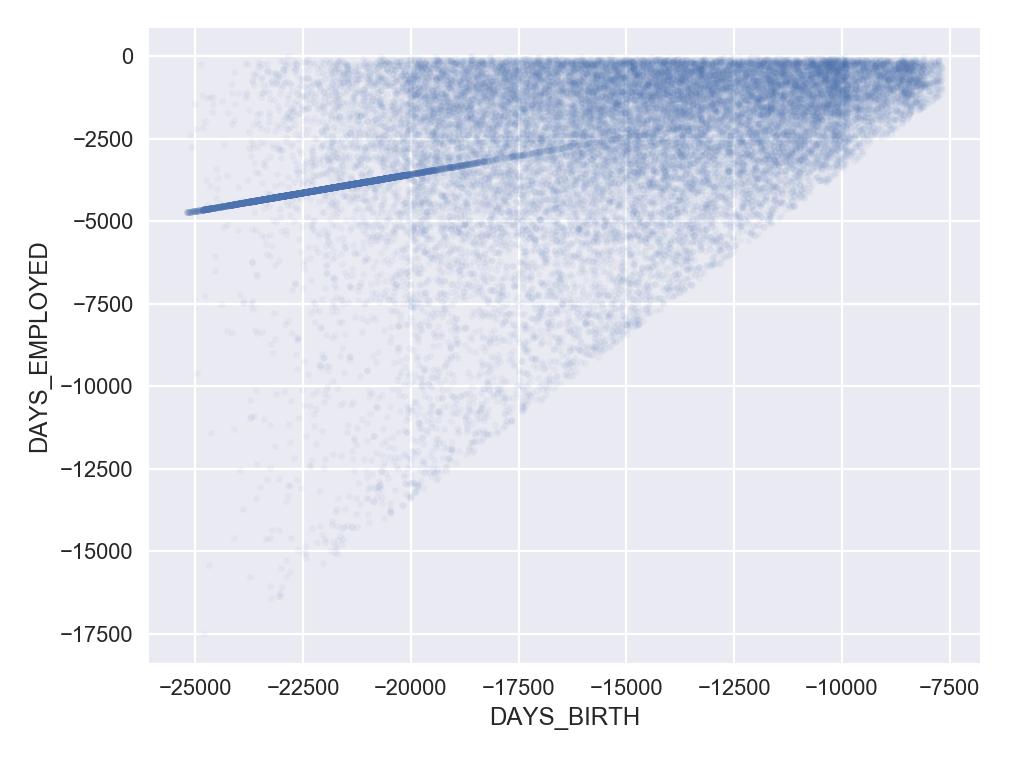

In [34]:
plt.figure()

quick_sample = application_train_df.sample(30000, random_state = 0)

sns.regplot(data = quick_sample,
            x = 'DAYS_BIRTH',
            y = 'DAYS_EMPLOYED',
            fit_reg = False,
            scatter_kws={'alpha':.05,"s":10})

plt.tight_layout()

That plot looks like it should now.

Now check some plots:

In [35]:
# get a random sample bc full sample is too much to plot
some_other_sample = balanced_sample(application_train_df, 24000, 0)

<IPython.core.display.Javascript object>


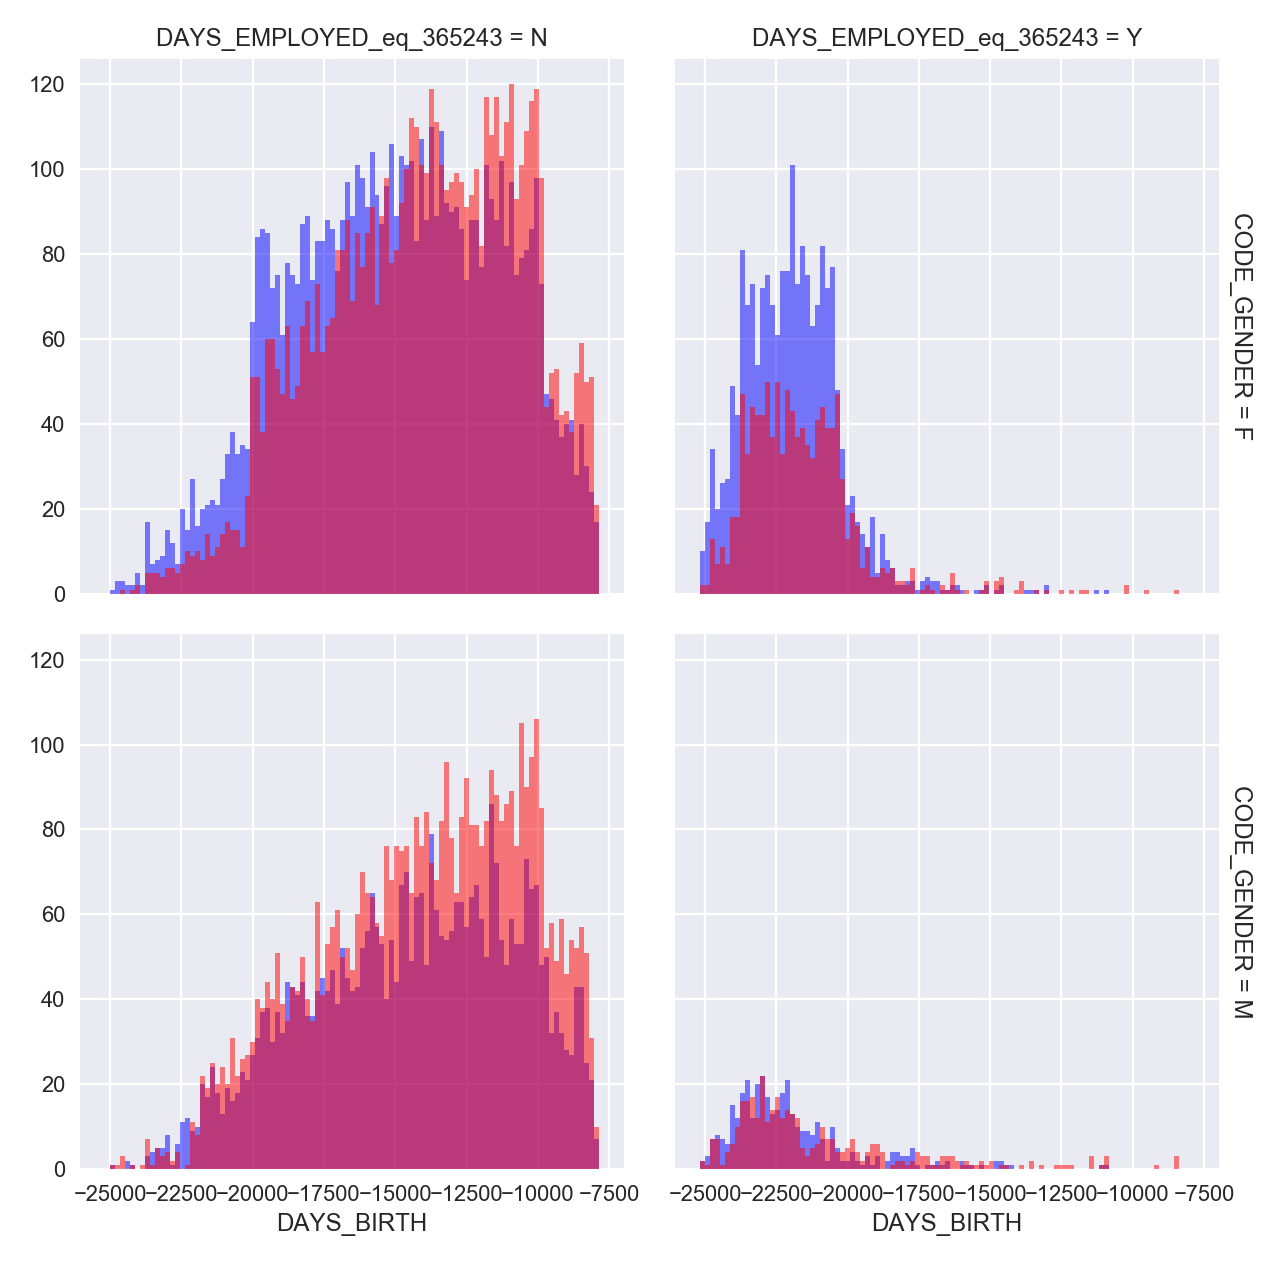

In [36]:
y_axs_feat = 'DAYS_BIRTH'

g = sns.FacetGrid(some_other_sample,
                  row = 'CODE_GENDER', 
                  col = 'DAYS_EMPLOYED_eq_365243', 
                  hue = 'TARGET',
                  palette = ['blue','red'],
                  size = 4,
                  margin_titles=True)

mn = min(some_other_sample[y_axs_feat])
mx = max(some_other_sample[y_axs_feat])

my_bins = np.arange(mn, mx, (mx-mn)/100)

g.map(plt.hist, y_axs_feat, bins = my_bins,**{'alpha':.5})

plt.tight_layout()

<IPython.core.display.Javascript object>


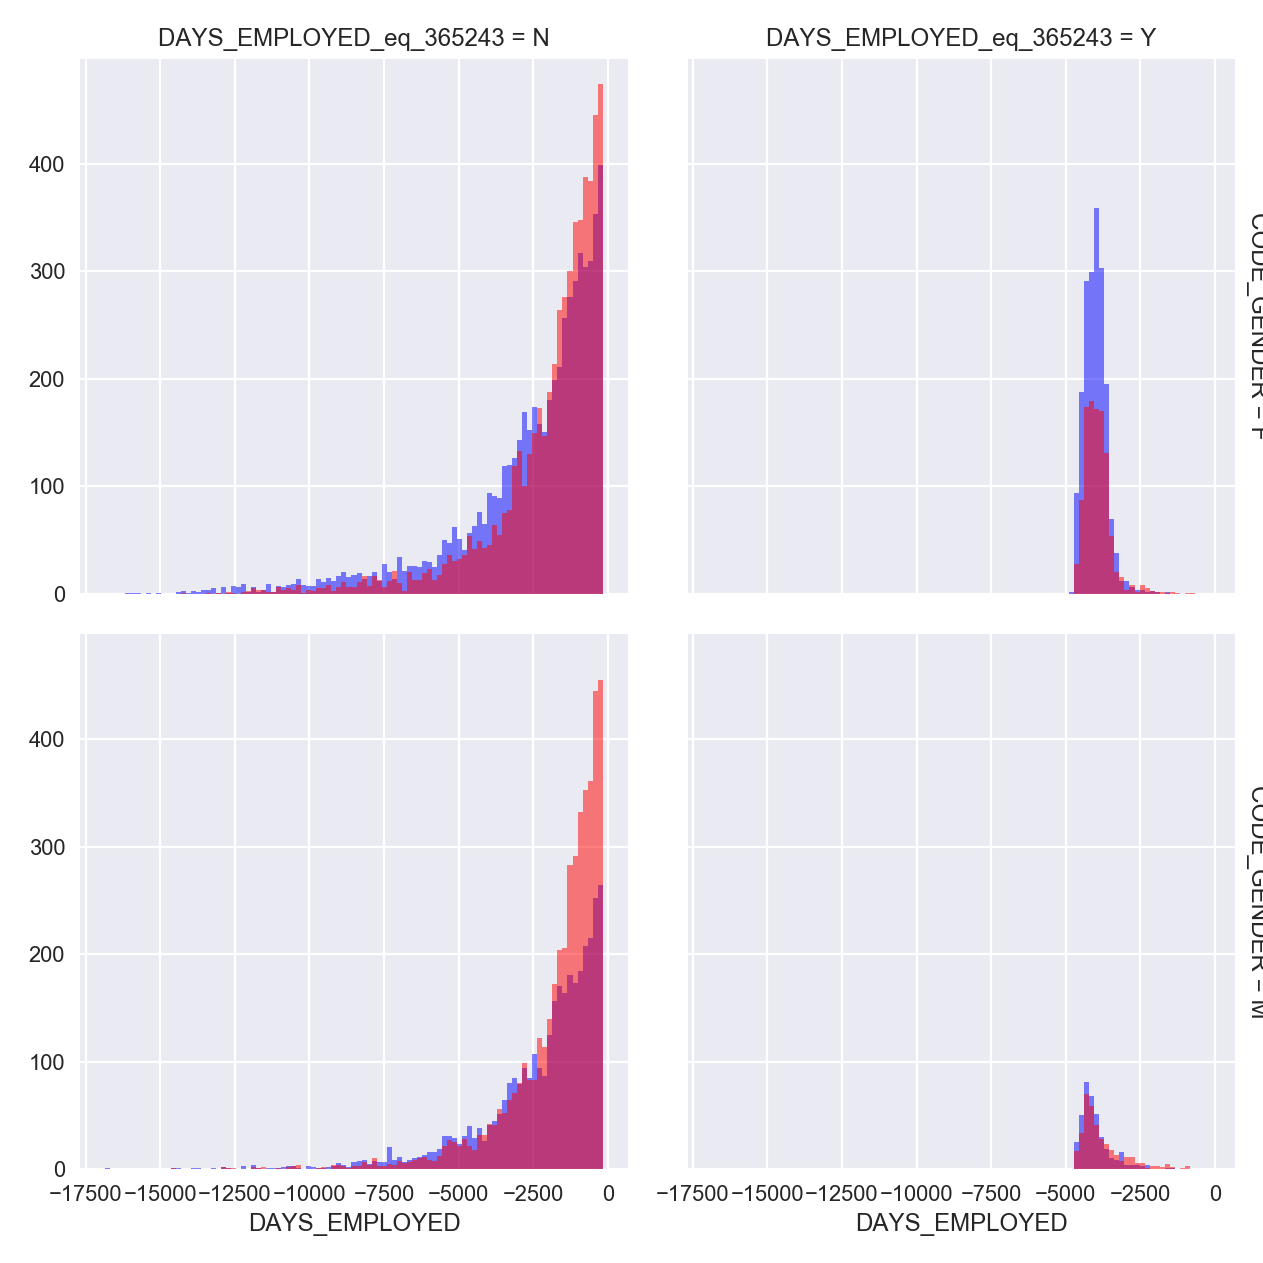

In [37]:
y_axs_feat = 'DAYS_EMPLOYED'

g = sns.FacetGrid(some_other_sample,
                  row = 'CODE_GENDER', 
                  col = 'DAYS_EMPLOYED_eq_365243', 
                  hue = 'TARGET',
                  palette = ['blue','red'],
                  size = 4,
                  margin_titles=True)

mn = min(some_other_sample[y_axs_feat])
mx = max(some_other_sample[y_axs_feat])

my_bins = np.arange(mn, mx, (mx-mn)/100)

g.map(plt.hist, y_axs_feat, bins = my_bins,**{'alpha':.5})

plt.tight_layout()

## Exploring variation in data (Gini etc)

In [27]:
# # I tried calculating the coefficient of variation at first, this is more objective that just SD
# # but there is no max value, so it isn't objective enough. 

# my_stdev = application_train_df._get_numeric_data().std()
# my_mean = application_train_df._get_numeric_data().mean()
# my_coeff_of_var =  my_stdev/my_mean

In [28]:
def gini_coeff(x):
    # modified from http://www.ellipsix.net/blog/2012/11/the-gini-coefficient-for-distribution-inequality.html
    # checked against http://shlegeris.com/gini
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = sum(x)        # s = x.sum()
    r = np.argsort(np.argsort([-i for i in  x])) # calculates zero-based ranks
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)

def drop_nans(list_in):
    return [x for x in list_in if str(x)!='nan']

def if_all_neg_make_pos(list_in):
    """Returns the same list if all elements are >0 or ==0. 
    If all elements are <0 or ==0, negates all elements and returns all positive elements list.
    If neither case returns NaN."""
    
    pos_test = [x for x in list_in if x>0 or x==0]
    if len(list_in)==len(pos_test):
        return list_in
        
    else:
        neg_test = [-x for x in list_in if x<0 or x==0]
        if len(list_in)==len(neg_test):
            return neg_test
        else:
            return [np.NaN]
        
def complete_gini_coef(list_in):
    """Define a nested function for calling with df.apply()"""
    return gini_coeff(if_all_neg_make_pos(drop_nans(list_in)))

In [29]:
app_just_nums = application_train_df._get_numeric_data()

In [30]:
Gini_coefs = app_just_nums.apply(complete_gini_coef)

In [31]:
Gini_coefs[Gini_coefs <.3].sort_values()

FLAG_MOBIL                      0.000003
FLAG_CONT_MOBILE                0.001867
YEARS_BEGINEXPLUATATION_MEDI    0.008474
YEARS_BEGINEXPLUATATION_AVG     0.008477
YEARS_BEGINEXPLUATATION_MODE    0.008975
YEARS_BUILD_MODE                0.077065
YEARS_BUILD_MEDI                0.079056
YEARS_BUILD_AVG                 0.080268
REGION_RATING_CLIENT_W_CITY     0.108810
REGION_RATING_CLIENT            0.110211
HOUR_APPR_PROCESS_START         0.152708
DAYS_BIRTH                      0.156803
FLAG_EMP_PHONE                  0.180111
EXT_SOURCE_2                    0.206085
SK_ID_CURR                      0.213336
CNT_FAM_MEMBERS                 0.216690
EXT_SOURCE_3                    0.217311
EXT_SOURCE_1                    0.242090
AMT_INCOME_TOTAL                0.276069
AMT_ANNUITY_from_app_train      0.284912
DAYS_ID_PUBLISH                 0.287616
FLAG_DOCUMENT_3                 0.289977
dtype: float64

In [32]:
Gini_coefs[Gini_coefs >.8].sort_values()

FLAG_WORK_PHONE                0.800632
NONLIVINGAREA_MEDI             0.802012
NONLIVINGAREA_MODE             0.819578
LIVE_CITY_NOT_WORK_CITY        0.820445
AMT_REQ_CREDIT_BUREAU_QRT      0.848648
NONLIVINGAPARTMENTS_AVG        0.868393
NONLIVINGAPARTMENTS_MEDI       0.871599
NONLIVINGAPARTMENTS_MODE       0.880625
AMT_REQ_CREDIT_BUREAU_MON      0.890281
DEF_30_CNT_SOCIAL_CIRCLE       0.904560
FLAG_DOCUMENT_6                0.911945
FLAG_DOCUMENT_8                0.918624
TARGET                         0.919271
REG_CITY_NOT_LIVE_CITY         0.921827
DEF_60_CNT_SOCIAL_CIRCLE       0.927638
FLAG_EMAIL                     0.943280
REG_REGION_NOT_WORK_REGION     0.949231
LIVE_REGION_NOT_WORK_REGION    0.959341
AMT_REQ_CREDIT_BUREAU_WEEK     0.969975
REG_REGION_NOT_LIVE_REGION     0.984856
FLAG_DOCUMENT_5                0.984885
FLAG_DOCUMENT_16               0.990072
FLAG_DOCUMENT_18               0.991870
AMT_REQ_CREDIT_BUREAU_HOUR     0.994154
AMT_REQ_CREDIT_BUREAU_DAY      0.995423


In [33]:
list(Gini_coefs[Gini_coefs >.8].sort_values().index.values)

['FLAG_WORK_PHONE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12']

In [70]:
corr_coeff_abs = app_just_nums.corr()['TARGET'].apply(abs)

In [71]:
Gini_coff_times_corr_coeff =   (Gini_coefs * corr_coeff_abs).sort_values(ascending = False)

In [87]:
Gini_coff_times_corr_coeff_df = Gini_coff_times_corr_coeff.to_frame()
Gini_coff_times_corr_coeff_df.drop(index="TARGET", inplace=True)
Gini_coff_times_corr_coeff_df.reset_index(inplace=True)
Gini_coff_times_corr_coeff_df.rename(columns={"index":'Feature',0: 'Gini*TARGET_corr'}, inplace=True)

<IPython.core.display.Javascript object>


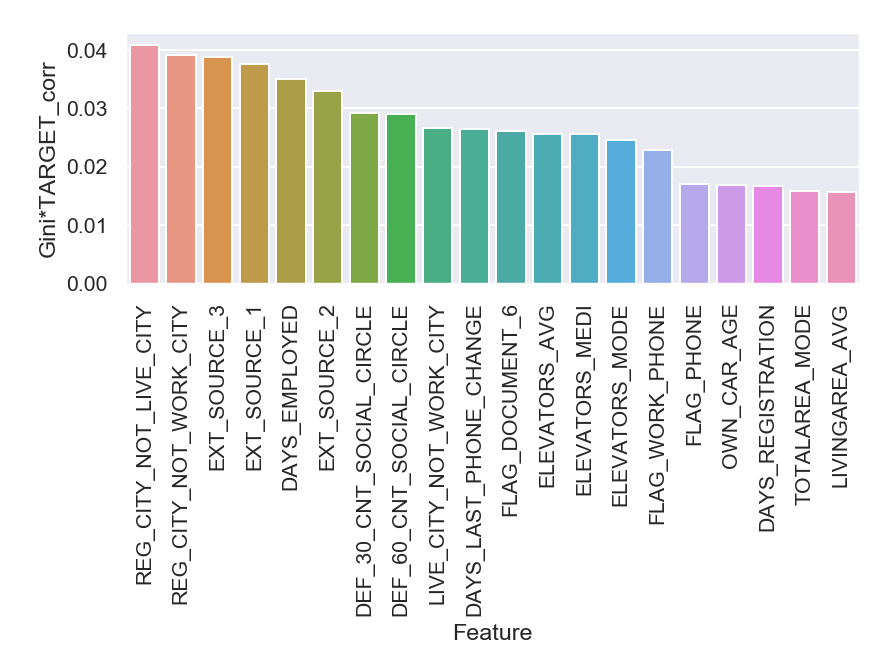

In [88]:
sns.barplot(x="Feature", y="Gini*TARGET_corr", data=Gini_coff_times_corr_coeff_df[:20])
plt.xticks(rotation=90)
plt.tight_layout()

## looking at EXT_SOURCE_1 - there are a lot of NaNs!

In [115]:
len(application_train_df[application_train_df['EXT_SOURCE_1'].isna()== True]), len(application_train_df[application_train_df['EXT_SOURCE_1'].isna()== False])

(173378, 134133)

In [102]:
# check how correlation EXT_
EXT_SOURCE_1_corrs = application_train_df.corr()[['EXT_SOURCE_1']]
EXT_SOURCE_1_corrs = EXT_SOURCE_1_corrs.apply(abs)
EXT_SOURCE_1_corrs.sort_values(by= ['EXT_SOURCE_1'])[-10:]

,EXT_SOURCE_1
DAYS_REGISTRATION,0.181095
REG_CITY_NOT_WORK_CITY,0.185953
EXT_SOURCE_3,0.186846
FLAG_DOCUMENT_6,0.190874
EXT_SOURCE_2,0.213982
DAYS_EMPLOYED,0.289848
FLAG_EMP_PHONE,0.294147
DAYS_BIRTH,0.600610
EXT_SOURCE_1,1.000000
FLAG_MOBIL,NaN


/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


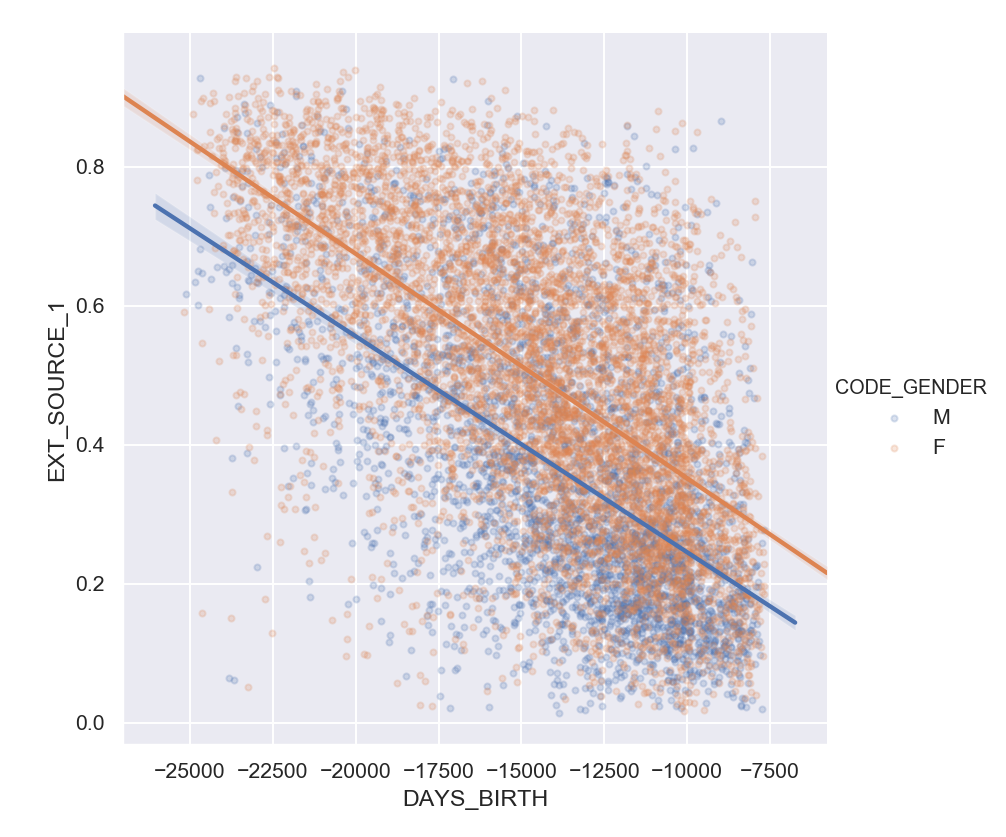

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [21]:
first_sample = balanced_sample(application_train_df, 24000, 0)

sns.lmplot(data = first_sample,
            x = 'DAYS_BIRTH',
            y = 'EXT_SOURCE_1',
            hue = 'CODE_GENDER', #'CNT_CHILDREN',#'FLAG_OWN_CAR',#'CODE_GENDER', #'REGION_RATING_CLIENT_W_CITY',
            fit_reg = True,
            scatter_kws={'alpha':.2,"s":10},
            #palette = ['green','orange'],
            legend_out = True,
            size = 6)


#plt.tight_layout()